In [117]:
import pandas as pd
import matplotlib.pyplot as plt


1. Load the data

In [118]:
titanic_data = pd.read_csv("titanic.csv")

print(f"total passengers are {len(titanic_data)}")
titanic_data.head()

total passengers are 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Check for missing values

In [119]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* handling missing values

1. for age we can use the average age

In [120]:
titanic_data_c1 = titanic_data.fillna(value=titanic_data["Age"].mean())
titanic_data_c1['Age'].isna().sum()

0

* now for Embarked column
* we can either drop as there are only 2 or try to fill with random or max of the column

In [122]:
type(titanic_data['Embarked'][0])

str

* it seems S is max number of times and since there are only few we can fill with it

In [123]:
titanic_data_c1['Embarked'].value_counts()

Embarked
S            644
C            168
Q             77
29.699118      2
Name: count, dtype: int64

In [124]:
valid_embarked_values = ['S', 'C', 'Q']
titanic_data_c1['Embarked'] = titanic_data_c1['Embarked'].apply(lambda x: x if x in valid_embarked_values else 'unknown')

In [125]:
titanic_data_c1['Embarked'].value_counts()

Embarked
S          644
C          168
Q           77
unknown      2
Name: count, dtype: int64

* now Cabin which there are a lot of na
* either drop or fill with unkown

In [126]:
titanic_data_c1['Cabin'].value_counts()

Cabin
29.699118      687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [127]:
titanic_data_c1['Cabin'] = titanic_data_c1['Cabin'].apply(lambda x: x if isinstance(x, str) else 'unknown')


In [128]:
titanic_data_c1['Cabin'].value_counts()

Cabin
unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

* the data is now clean

2. Visualization

In [129]:
titanic_data_c1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

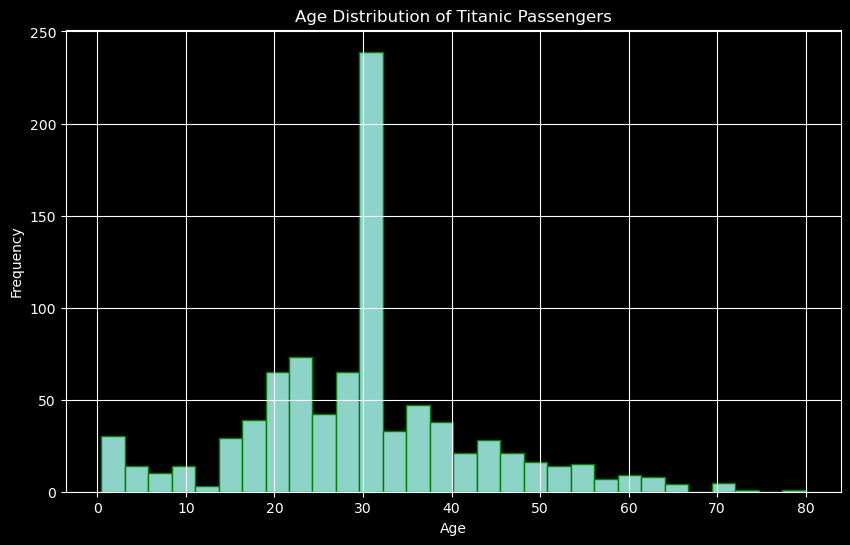

In [130]:
# plot age distribution
plt.figure(figsize=(10, 6))
plt.hist(titanic_data_c1['Age'], bins=30, edgecolor='green', linewidth=1.0)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Titanic Passengers')
plt.grid(True)
plt.show()

In [131]:
titanic_data_c1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [132]:
titanic_data_c1['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

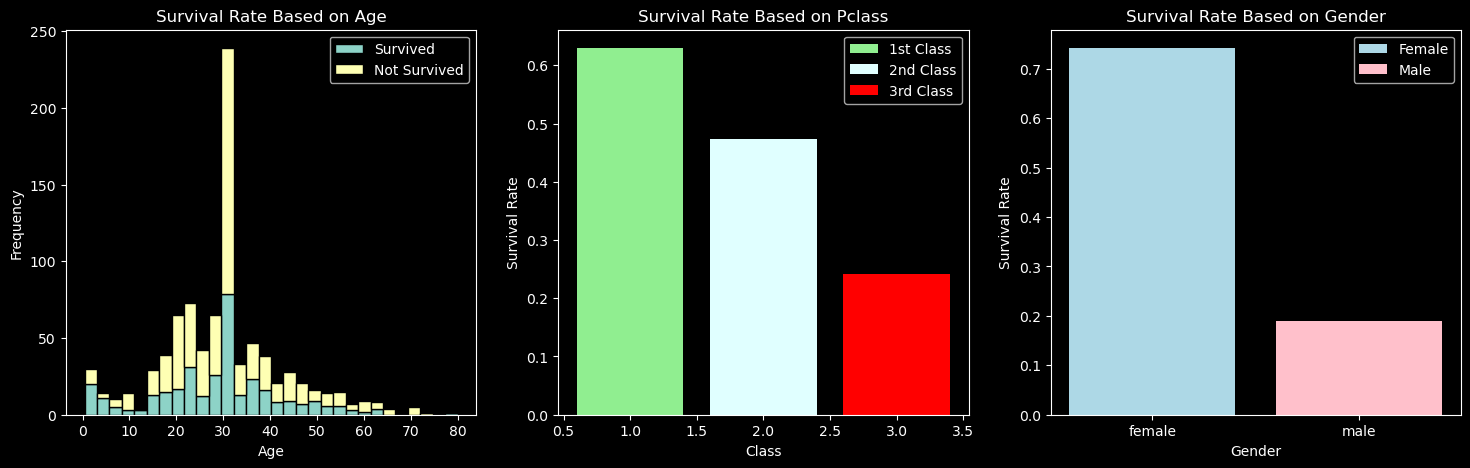

In [133]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot survival rate based on Age
survived_age_c1 = titanic_data_c1[titanic_data_c1['Survived'] == 1]['Age']
not_survived_age_c1 = titanic_data_c1[titanic_data_c1['Survived'] == 0]['Age']
axs[0].hist([survived_age_c1, not_survived_age_c1], bins=30, stacked=True, edgecolor='black', label=['Survived', 'Not Survived'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Survival Rate Based on Age')

# Plot survival rate based on Class
class_survival = titanic_data_c1.groupby('Pclass')['Survived'].mean()
colors = ['lightgreen', 'lightcyan', 'red']
bars = axs[1].bar(class_survival.index, class_survival.values, color=colors)
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Survival Rate')
axs[1].set_title('Survival Rate Based on Pclass')
axs[1].legend(bars, ['1st Class', '2nd Class', '3rd Class'])

# Plot survival rate based on Gender
gender_survival = titanic_data_c1.groupby('Sex')['Survived'].mean()
gender_colors = ['lightblue', 'pink']
bars_gender = axs[2].bar(gender_survival.index, gender_survival.values, color=gender_colors)
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Survival Rate')
axs[2].set_title('Survival Rate Based on Gender')
axs[2].legend(bars_gender, ['Female', 'Male'])

plt.show()


# plot family sizes

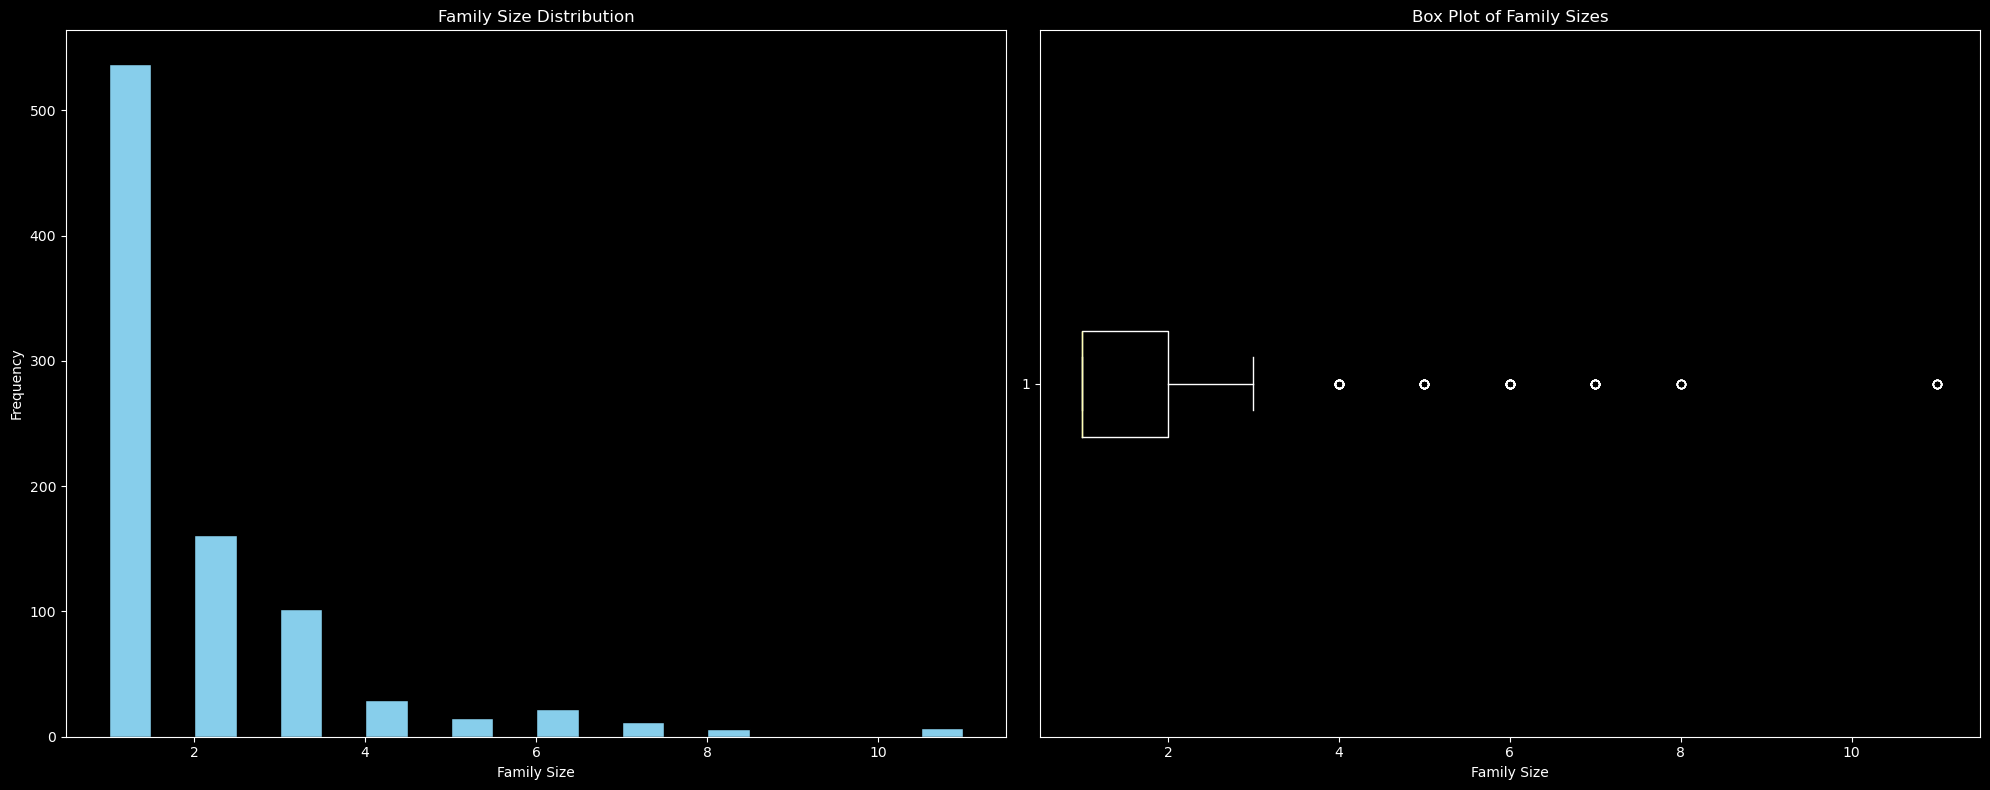

In [138]:
titanic_data_c1['FamilySize'] = titanic_data_c1['SibSp'] + titanic_data_c1['Parch'] + 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

# Plot the distribution of family sizes
ax1.hist(titanic_data_c1['FamilySize'], bins=20, color='skyblue', edgecolor='black')
ax1.set_xlabel('Family Size')
ax1.set_ylabel('Frequency')
ax1.set_title('Family Size Distribution')

# Plot the box plot of family sizes
ax2.boxplot(titanic_data_c1['FamilySize'], vert=False)
ax2.set_xlabel('Family Size')
ax2.set_title('Box Plot of Family Sizes')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

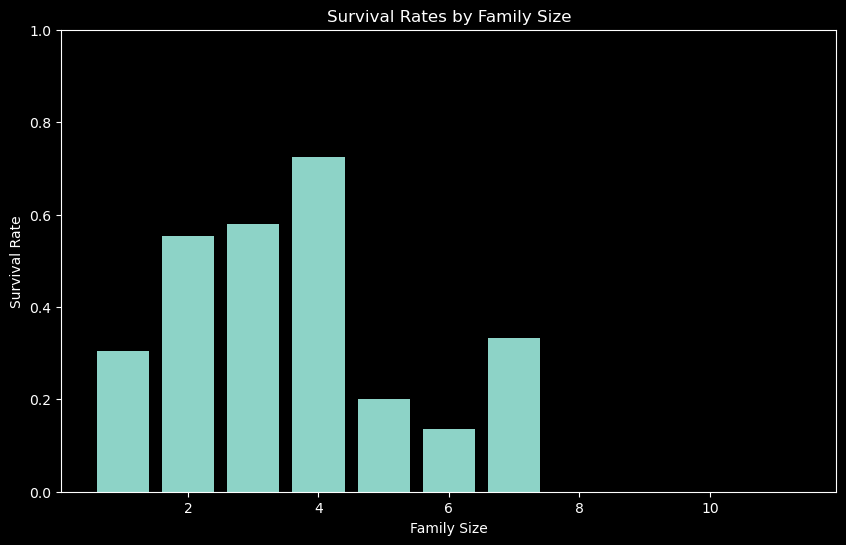

In [137]:

# Calculate survival rates by family size
survival_rates = titanic_data_c1.groupby('FamilySize')['Survived'].mean().reset_index()

# Create a bar plot of survival rates by family size
plt.figure(figsize=(10, 6))
plt.bar(survival_rates['FamilySize'], survival_rates['Survived'])
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Family Size')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for survival rates
plt.xticks(rotation=0)
plt.show()

# Conclusion and insights

* The age Distribution tells us there were a large number of people of age 30  (including the missing 177 that were filled with mean)


* This might be coincidently, but the Survival rate based on the class tells us Higher class people had higher surviavl rates 
* First Class Suite ticket was £870 ($4,350), First Class Berth was £30 ($150), Second Class was £12 ($60), and Third Class was £7 ($35).                 *(1)
* the age vs survival tells us that for the most part similar percentages of people in each age range survived but older people (>50) are lower survival rate
* it is also clear that there were more women survivors "The prioritization of "women and children first" during the evacuation process, according to orders from Captain Edward John Smith"     *(2)
* but this can be ignored as they were also considerably few people in that age range

# family sizes

* apart from outliers the average family sizes ranged from 0 to 2 with few more families in the ranges 4-10 
* and family sizes less than 4 had better chance of survival
* even though there werent many families larger than 4 compared to small ones

# references


* (1).  https://usarover.com/titanic-ticket-price/

* (2).  https://history.howstuffworks.com/historical-figures/titanic-survivors.htm#pt3


# Libraries 
* https://pandas.pydata.org/docs/user_guide/index.html#user-guide
* https://matplotlib.org/stable/api/pyplot_summary.html

